In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

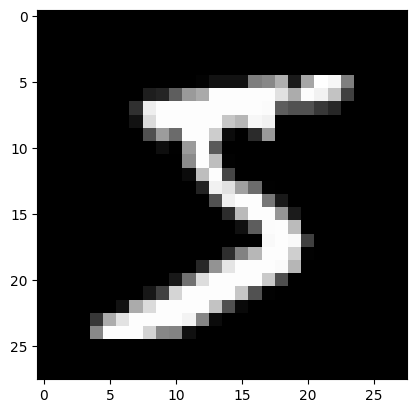

In [ ]:
plt.imshow(single_image,cmap='gray')

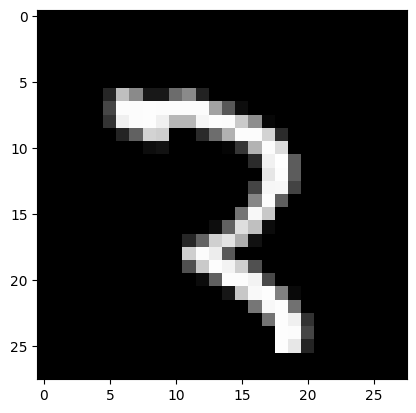

In [ ]:

y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [ ]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                86544     
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 21s 21ms/step - loss: 0.3395 - accuracy: 0.8946 - val_loss: 0.1228 - val_accuracy: 0.9653
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0993 - accuracy: 0.9702 - val_loss: 0.0713 - val_accuracy: 0.9747
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0693 - accuracy: 0.9792 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0704 - val_accuracy: 0.9770
Epoch 5/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0512 - val_accuracy: 0.9831


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.339490,0.894550,0.122796,0.9653
1,0.099307,0.970217,0.071349,0.9747
2,0.069271,0.979167,0.056264,0.9814
3,0.055483,0.982767,0.070356,0.9770
4,0.045002,0.986033,0.051236,0.9831


<Axes: >

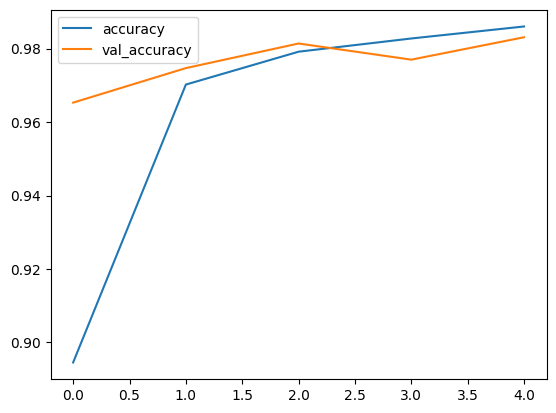

In [ ]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

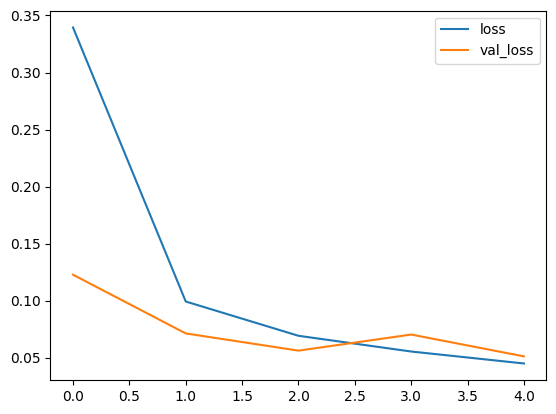

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 1s 4ms/step
[[ 967    0    2    1    0    0    8    0    1    1]
 [   0 1128    4    0    0    0    1    2    0    0]
 [   1    2 1018    0    1    0    2    5    3    0]
 [   0    1    5  988    0    7    0    2    7    0]
 [   1    0    0    0  960    0    6    1    3   11]
 [   0    0    0    5    0  881    4    0    2    0]
 [   1    2    0    0    2    1  949    0    3    0]
 [   2    2   16    1    0    0    0 1002    3    2]
 [   1    0    3    1    0    2    1    3  961    2]
 [   1    0    1    4    4    9    0    5    8  977]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99  

1/1 [==============================] - 0s 16ms/step
[5]
1/1 [==============================] - 0s 16ms/step
[6]


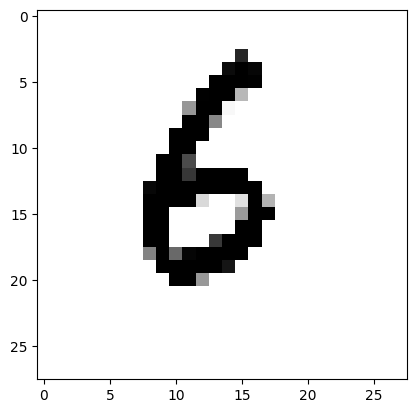

In [ ]:
img = image.load_img('six.png')


type(img)


img = image.load_img('six.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0



x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


print(x_single_prediction)


plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0



x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


print(x_single_prediction)